# Задание на работу

1. При помощи программы «Circles», (листинг: Вариант 1, см. Приложение 1) получить исходные данные для задачи классификации: матрицу признаков X и
массив целевых меток y.
2. Создать и обучить модель классификации на основе метода опорных векторов, использующую RBF-ядро. Выбрать оптимальные гиперпараметры модели.
Определить и вывести на печать удельные количества ошибок на обучающем и тестовом подмножествах данных. Построить график области решений при
помощи функции plot_decision_regions(), разработанной ранее на практических занятиях.
3. Создать и обучить модель классификации на основе построения дерева решений. Выбрать оптимальные гиперпараметры модели. Определить и вывести на
печать удельные количества ошибок на обучающем и тестовом подмножествах данных. Построить график области решений при помощи функции
plot_decision_regions(), разработанной ранее на практических занятиях.
4. Сравнить качество исследуемых моделей классификации.

In [69]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

# Задание 1
При помощи программы «Circles», (листинг: Вариант 1, см. Приложение 1) получить исходные данные для задачи классификации: матрицу признаков X и массив целевых меток y.

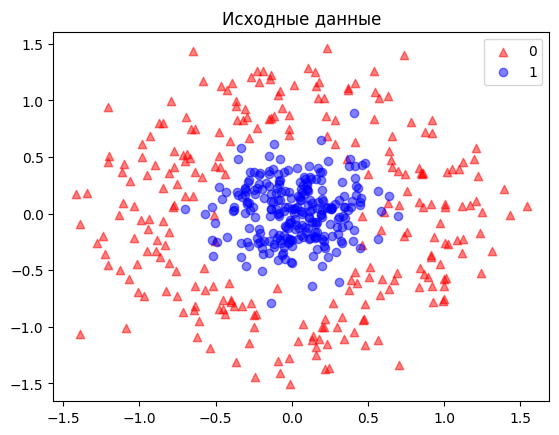

In [70]:
x, y = make_circles(n_samples=512, random_state=123, noise=0.22, factor=0.16)

plt.figure()
plt.scatter(x[y==0, 0], x[y==0, 1], color='red', marker='^', alpha=0.5, label='0')
plt.scatter(x[y==1, 0], x[y==1, 1], color='blue', marker='o', alpha=0.5, label='1')
plt.legend()
plt.title('Исходные данные')
plt.show()

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

# Задание 2
Создать и обучить модель классификации на основе метода опорных векторов, использующую RBF-ядро. Выбрать оптимальные гиперпараметры модели. Определить и вывести на печать удельные количества ошибок на обучающем и тестовом подмножествах данных. Построить график области решений при помощи функции plot_decision_regions(), разработанной ранее на практических занятиях.

In [72]:
# Самостоятельный подбор параметров
svm = SVC(kernel='rbf', C=1.0, gamma=20, random_state=123)

In [73]:
svm.fit(x_train, y_train)

SVC(gamma=20, random_state=123)

In [74]:
print(f'''Удельное количество ошибок на обучающем наборе: {np.mean(y_train != svm.predict(x_train))}
Удельное количество ошибок на тестовом наборе: {np.mean(y_test != svm.predict(x_test))}''')

Удельное количество ошибок на обучающем наборе: 0.029339853300733496
Удельное количество ошибок на тестовом наборе: 0.038834951456310676


In [75]:
def plotDecisionRegions(x, y, classifier, resolution=0.02, test_idx=None):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = x[:,0].min() - 1, x[:,0].max() + 1
    x2_min, x2_max = x[:,1].min() - 1, x[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],
                    edgecolor='black', marker = markers[idx], label=cl)
        if test_idx:
            x_test = x[test_idx, :]
            plt.scatter(x_test[:, 0], x_test[:, 1], c='', alpha=1.0,
                        edgecolor='black', linewidths=1, marker='o', s=120,
                        label='test set')

<ipython-input-75-38f04c819822>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],


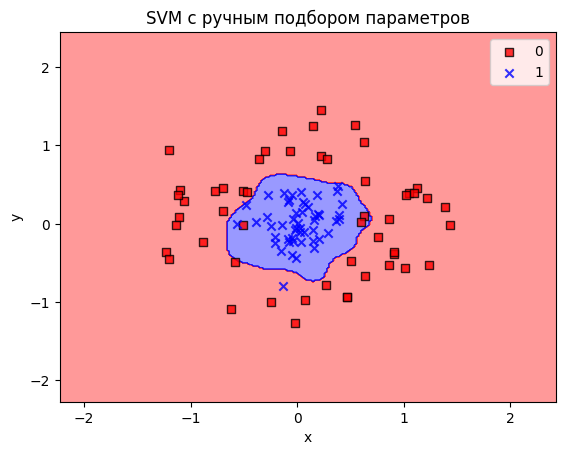

In [76]:
plotDecisionRegions(x_test, y_test, svm)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('SVM с ручным подбором параметров')
plt.show()

In [77]:
# Автоматический подбор параметров
svm_grid = SVC(kernel='rbf', random_state=123)

In [78]:
c_array = np.logspace(-3, 3, num=14)
gamma_array = np.logspace(-5, 2, num=8)

grid = GridSearchCV(svm_grid, param_grid={'C':c_array, 'gamma':gamma_array})

In [79]:
grid.fit(x_train, y_train)

GridSearchCV(estimator=SVC(random_state=123),
             param_grid={'C': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03]),
                         'gamma': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])})

In [80]:
svm_grid.fit(x_train, y_train)

SVC(random_state=123)

In [81]:
print(f'''Удельное количество ошибок на обучающем наборе: {np.mean(y_train != svm_grid.predict(x_train))}
Удельное количество ошибок на тестовом наборе: {np.mean(y_test != svm_grid.predict(x_test))}''')

Удельное количество ошибок на обучающем наборе: 0.044009779951100246
Удельное количество ошибок на тестовом наборе: 0.02912621359223301


<ipython-input-75-38f04c819822>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],


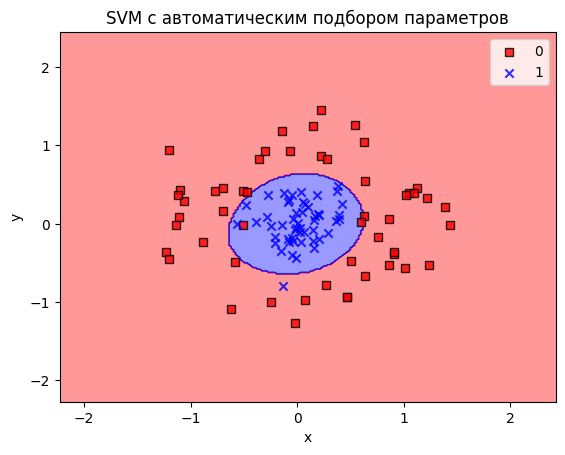

In [82]:
plotDecisionRegions(x_test, y_test, svm_grid)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('SVM с автоматическим подбором параметров')
plt.show()

# Задание 3
Создать и обучить модель классификации на основе построения дерева решений. Выбрать оптимальные гиперпараметры модели. Определить и вывести на печать удельные количества ошибок на обучающем и тестовом подмножествах данных. Построить график области решений при помощи функции plot_decision_regions(), разработанной ранее на практических занятиях.

In [83]:
# Самостоятельный подбор параметров
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

In [84]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

In [85]:
print(f'''Удельное количество ошибок на обучающем наборе: {np.mean(y_train != decision_tree.predict(x_train))}
Удельное количество ошибок на тестовом наборе: {np.mean(y_test != decision_tree.predict(x_test))}''')

Удельное количество ошибок на обучающем наборе: 0.11246943765281174
Удельное количество ошибок на тестовом наборе: 0.18446601941747573


<ipython-input-75-38f04c819822>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],


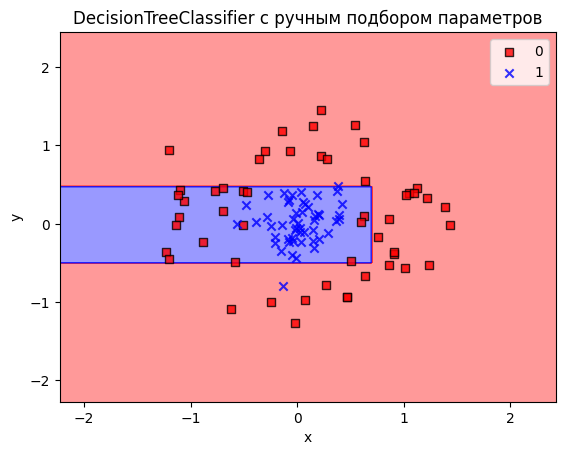

In [86]:
plotDecisionRegions(x_test, y_test, decision_tree)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('DecisionTreeClassifier с ручным подбором параметров')
plt.show()

In [87]:
# Автоматический подбор параметров
decision_tree_grid = DecisionTreeClassifier(criterion='entropy', random_state=123)

max_depth_array = np.arange(1,31,1)

grid_tree = GridSearchCV(decision_tree_grid, param_grid={'max_depth':max_depth_array})
grid_tree.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=123),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])})

In [88]:
decision_tree_grid.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=123)

In [89]:
print(f'''Удельное количество ошибок на обучающем наборе: {np.mean(y_train != decision_tree_grid.predict(x_train))}
Удельное количество ошибок на тестовом наборе: {np.mean(y_test != decision_tree_grid.predict(x_test))}''')

Удельное количество ошибок на обучающем наборе: 0.0
Удельное количество ошибок на тестовом наборе: 0.0970873786407767


<ipython-input-75-38f04c819822>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],


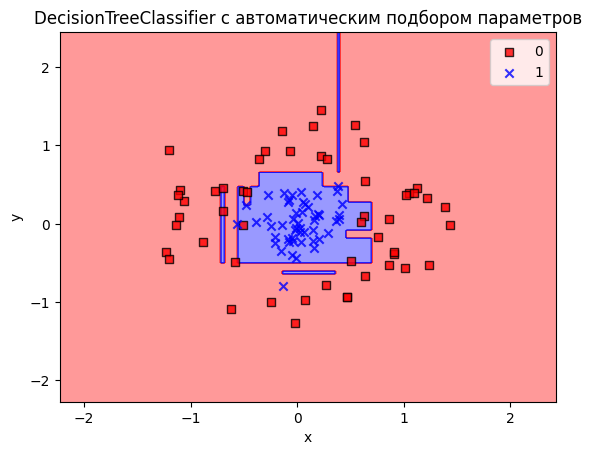

In [90]:
plotDecisionRegions(x_test, y_test, decision_tree_grid)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('DecisionTreeClassifier с автоматическим подбором параметров')
plt.show()

# Задание 4
Сравнить качество исследуемых моделей классификации.

В ходе лабораторной работы были исследованы 2 вида моделей: модель метода опорных векторов и модель дерева решений. Каждая из моделей была обучена два раза: с ручным подборомгиперпараметров и с автоматическим подбором гиперпараметров.

По итогам были получены следующие результаты по ошибкам на тестовой выборке:

Модель опорных векторов:

Ручной подбор гиперпараметров: 0.0388

Автоматический подбор: 0.0291

Модель дерева решений:

Ручной подбор гиперпараметров: 0.1845

Автоматический подбор: 0.0971

Как можно заметить, в обоих моделях автоматический подбор гиперпараметров благоприятно влияет на качество работы модели, значительно повышая её точность. Если говорить о сравнении моделей между собой, то лучше в данной задачи справляется модель опроных векторов, так как дерево решений в процессе своего обучения делит пространство на прямоугольники, получая сложные границы решений, которые не всегда хорошо влияют на качество в местах близкого расположения объектов разного класса.
